In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [83]:
df = pd.read_excel('camry.xlsx')

In [85]:
df2 = df

In [86]:
df2.rename(columns={'Miles (1000s)': 'miles','Price ($1000s)': 'price' }, inplace=True)

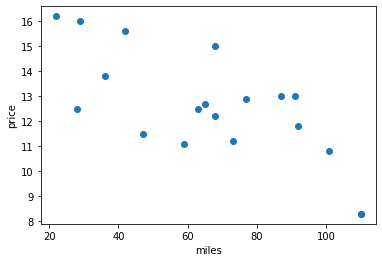

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(x='Miles (1000s)',y='Price ($1000s)', data = df)
plt.xlabel('miles')
plt.ylabel('price')
plt.show()
plt.clf()



In [9]:
model = LinearRegression()

In [10]:
inputs = df[['Miles (1000s)']]
targets = df[['Price ($1000s)']]

In [11]:
model.fit(inputs, targets)

LinearRegression()

In [13]:
predictions = model.predict(inputs)

In [14]:
predictions

array([[15.17672853],
       [14.76531101],
       [14.35389349],
       [13.70738023],
       [12.76699732],
       [11.94416228],
       [12.17925801],
       [11.35642296],
       [11.0625533 ],
       [10.53358791],
       [10.00462253],
       [14.82408494],
       [13.00209305],
       [12.47312766],
       [12.47312766],
       [11.12132723],
       [14.00124989],
       [12.64944946],
       [10.00462253]])

In [15]:
def rms(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


In [16]:
rms(targets, predictions)

/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Price ($1000s)    1.457997
dtype: float64

In [17]:
model.score(inputs, targets)

0.5386573970074375

In [18]:
model.coef_

array([[-0.05877393]])

In [19]:
model.intercept_

array([16.46975503])

In [20]:
resid = predictions - targets

In [21]:
resid

,Price ($1000s)
0,-1.023271
1,-1.234689
2,0.553893
3,2.207380
4,0.266997
5,-0.955838
6,0.979258
7,-1.643577
8,-0.737447
9,-0.266412


In [34]:
df.iloc[3]

Miles (1000s)     47.0
Price ($1000s)    11.5
Name: 3, dtype: float64

In [33]:
df.iloc[11]

Miles (1000s)     28.0
Price ($1000s)    12.5
Name: 11, dtype: float64

In [25]:
resid.iloc[3]

Price ($1000s)    2.20738
Name: 3, dtype: float64

In [26]:
resid.iloc[11]

Price ($1000s)    2.324085
Name: 11, dtype: float64

In [30]:
model.predict(np.array([[100]]))

/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.59236184]])

In [35]:
df.cov()

,Miles (1000s),Price ($1000s)
Miles (1000s),758.426901,-44.575731
Price ($1000s),-44.575731,4.863743


In [38]:
results = model.fit(inputs, targets)

In [41]:
df.shape

(19, 2)

In [42]:
dof = 17 

In [95]:
from scipy import stats

In [93]:
stats.t.isf(.01/2, dof)

2.898230519634717

In [89]:
model2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     19.85
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           0.000348
Time:                        05:02:20   Log-Likelihood:                -34.124
No. Observations:                  19   AIC:                             72.25
Df Residuals:                      17   BIC:                             74.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4698      0.949     17.359      0.000      14.468      18.471
miles         -0.0588      0.013     -4.455      0.000      -0.087      -0.031
==============================================================================
Omnibus:                        2.556   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.148
Skew:                          -0.097   Prob(JB):                        0.563
Kurtosis:                       1.811   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#The absolute value of miles T stat is greater than t test threshold therefore we can reject the null